<a href="https://colab.research.google.com/github/selsiya-droid/kkmusic/blob/master/kkbox_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
members = pd.read_csv('/content/drive/My Drive/selsiya/members.csv')
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [2]:
members.shape

(34403, 7)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


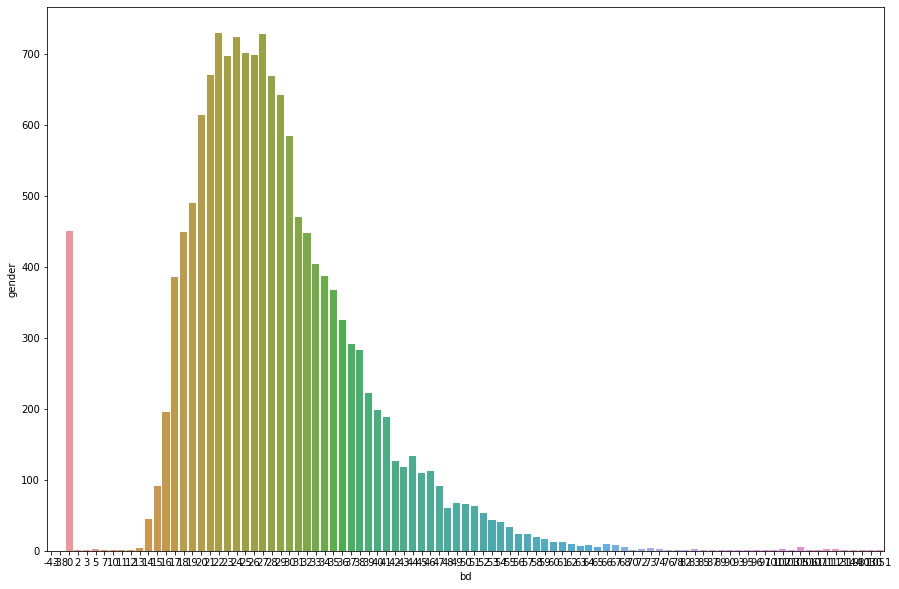

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

f,axarray = plt.subplots(1,1,figsize=(15,10))
agehist = members.groupby(['bd'],as_index=False).count()
sns.barplot(x=agehist['bd'],y=agehist['gender'])

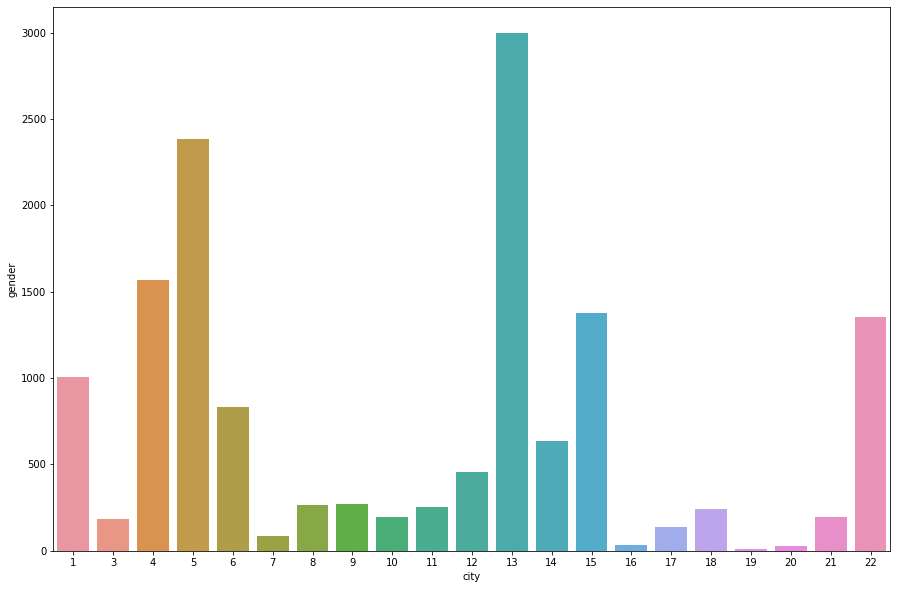

In [4]:
f,axarray = plt.subplots(1,1,figsize=(15,10))
cityhist = members.groupby(['city'],as_index=False).count()
sns.barplot(x=cityhist['city'],y=cityhist['gender'])

In [5]:
import numpy as np 
import pandas as pd 
songs = pd.read_csv('/content/drive/My Drive/selsiya/songs.csv')
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [6]:
print ("There are:",len(songs),"songs;",len(songs['composer'].unique()),
       "composers for",len(songs['genre_ids'].unique()),"genres in",
      len(songs['language'].unique()),"languages")

There are: 2296320 songs; 329824 composers for 1046 genres in 11 languages


In [7]:
import numpy as np 
import pandas as pd 
train = pd.read_csv('/content/drive/My Drive/selsiya/train.csv')
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [8]:
df = train.merge(members,how='inner',on='msno')
df = df.merge(songs,how='inner',on='song_id')
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,15,18,male,4,20151220,20170930,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,1,0,NaN,7,20120804,20171004,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,5,21,female,9,20110808,20170917,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0,6,33,female,9,20070323,20170915,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0


In [9]:
df.shape

(7377304, 18)

In [0]:
import numpy as np 
import pandas as pd 
cities = df['city'].unique()
ca = []
for c in cities:
    ages = []
    tmp = df[df['city']==c].groupby(['bd'],as_index=False).count()
    for i in range(60):
        if i in tmp['bd'].values:
            if i ==0:
                ages.append(0)
            else:
                ages.append(tmp[tmp['bd']==i].values[0][1])
        else:
            ages.append(0)
    ca.append(ages)
cadf = pd.DataFrame(ca)

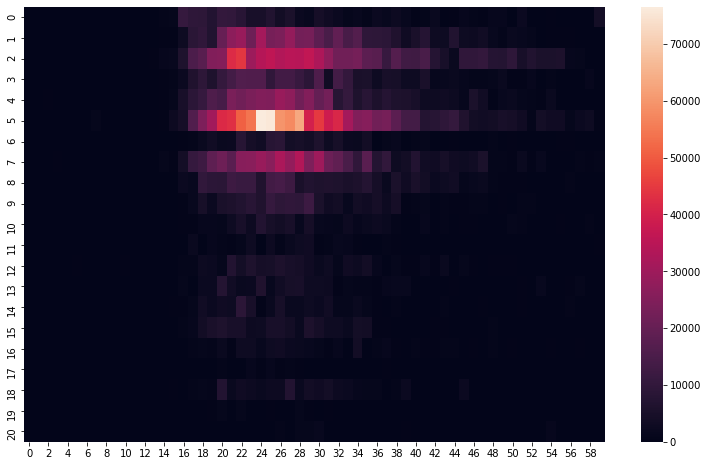

In [11]:
f,axarray = plt.subplots(1,1,figsize=(13,8))
sns.heatmap(cadf)

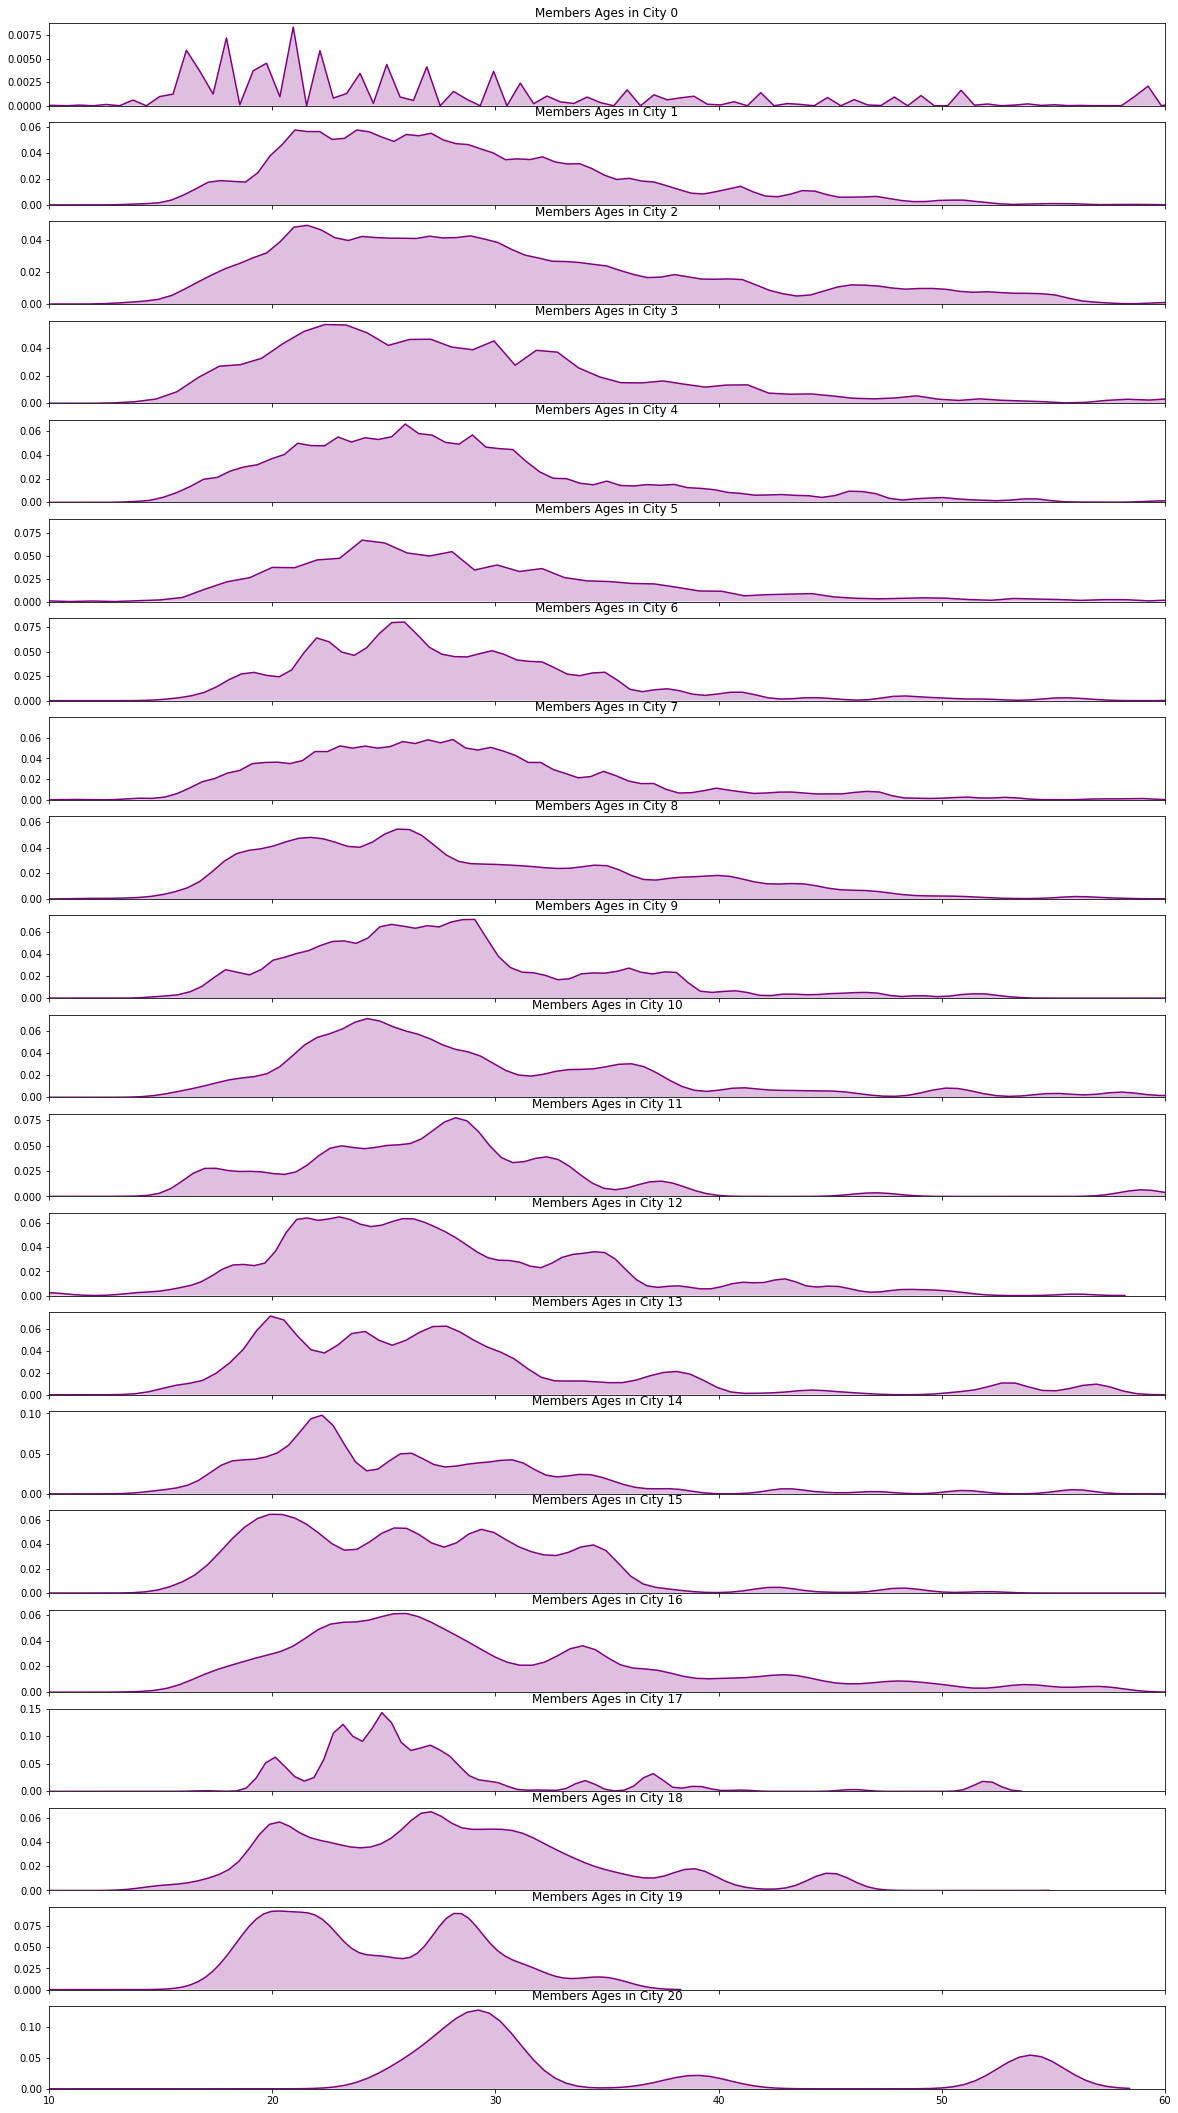

In [12]:
import numpy as np 
import pandas as pd 
fdf = df[np.abs(df['bd']-df['bd'].mean())<=(3*df['bd'].std())]
cities = fdf['city'].unique()
ca = []
for c in cities:
    ages = []
    tmp = fdf[fdf['city']==c]['bd'].values
    ages.append(tmp)
    ca.append(ages)
cadf = pd.DataFrame(ca)
f,axarray = plt.subplots(21,1,figsize=(20,38),sharex=True)
plt.xlim(10,60)
for i in range(21):
    axarray[i].set_title('Members Ages in City '+str(i))
    sns.distplot(ca[i], hist=False, color="purple", kde_kws={"shade": True},ax=axarray[i])

In [13]:
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'],format="%Y%m%d")
df['expiration_date'] = pd.to_datetime(df['expiration_date'],format="%Y%m%d")
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,2012-01-02,2017-10-05,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,15,18,male,4,2015-12-20,2017-09-30,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,1,0,NaN,7,2012-08-04,2017-10-04,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,5,21,female,9,2011-08-08,2017-09-17,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0,6,33,female,9,2007-03-23,2017-09-15,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0


In [14]:
days = df.expiration_date - df.registration_init_time
days = [d.days for d in days]
df['days']=days
np.max(days)

5149

In [15]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,days
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,2012-01-02,2017-10-05,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,2103
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,15,18,male,4,2015-12-20,2017-09-30,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,650
2,xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,1,0,NaN,7,2012-08-04,2017-10-04,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,1887
3,s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,1,5,21,female,9,2011-08-08,2017-09-17,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,2232
4,Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-library,0,6,33,female,9,2007-03-23,2017-09-15,206471,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,3829


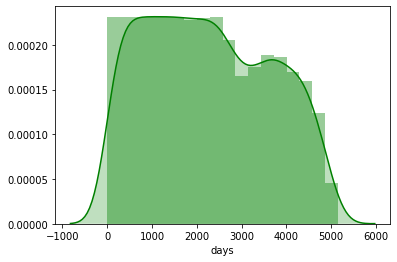

In [16]:
fdf = df[np.abs(df['days']-df['days'].mean())<=(3*df['days'].std())]
dayshist = df.groupby(['days'],as_index=False).count()
dayshist = dayshist.drop(0,axis=0)
sns.distplot(dayshist['days'], hist=True, color="g", kde_kws={"shade": True})

In [0]:
cities = fdf['city'].unique()
cduration = []
for c in cities:
    duration = []
    tmp = fdf[fdf['city']==c]['days']
    cduration.append(tmp)

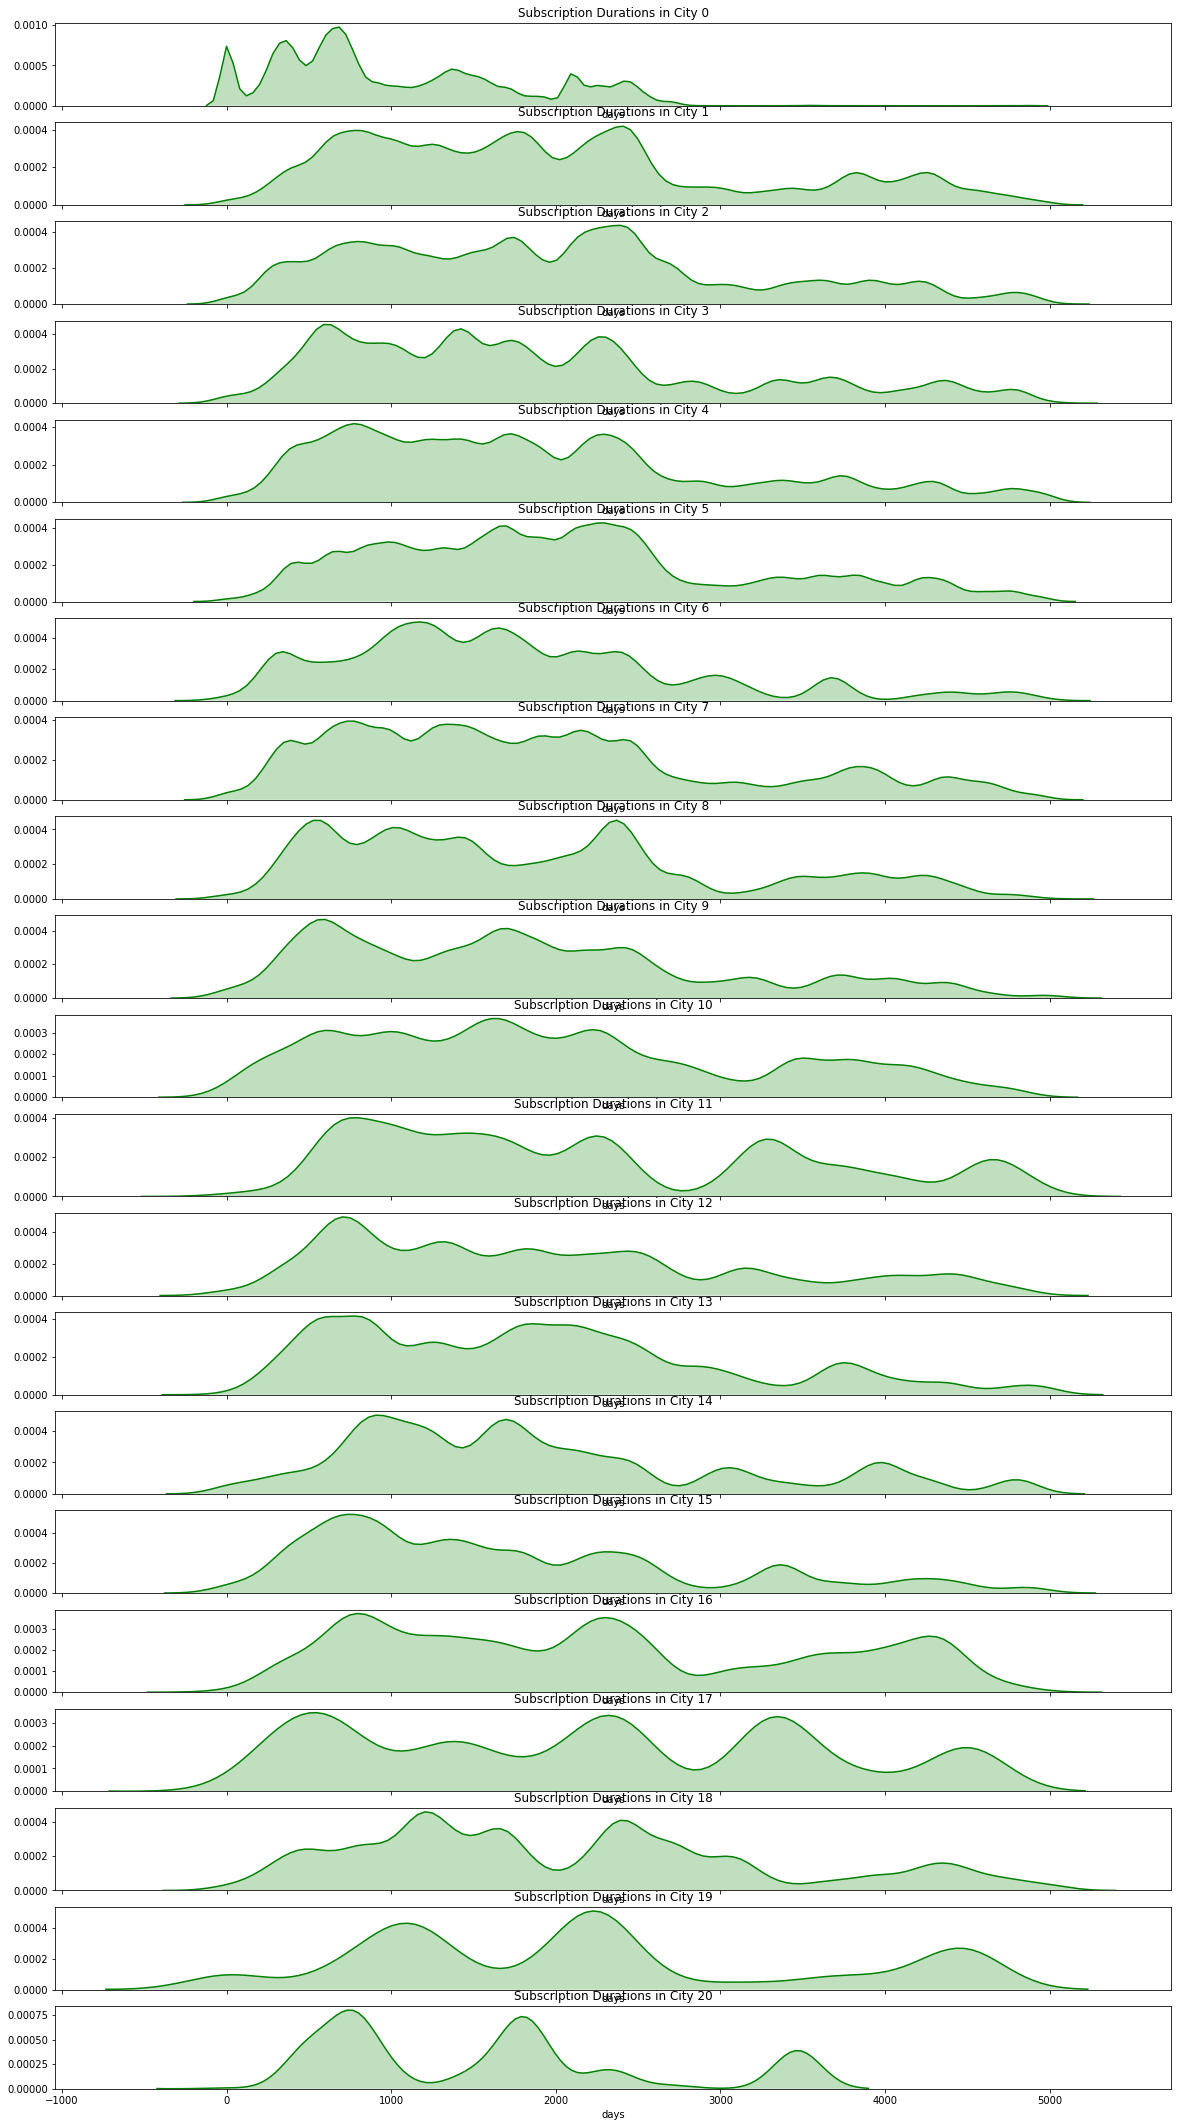

In [18]:
f,axarray = plt.subplots(21,1,figsize=(20,38),sharex=True)
for i in range(21):
    axarray[i].set_title('Subscription Durations in City '+str(i))
    sns.distplot(cduration[i], hist=False, color="g", kde_kws={"shade": True},ax=axarray[i])

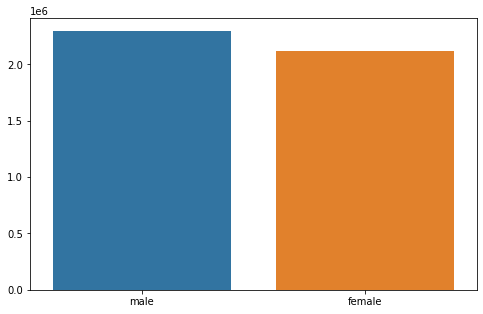

In [19]:
malec = len(df[df['gender']=='male'])
femalec = len(df[df['gender']=='female'])
f,axarray = plt.subplots(1,1,figsize=(8,5))
sns.barplot(x=['male','female'],y=[malec,femalec])